**Valentine Shilov**

**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics.pairwise import pairwise_distances

from scipy.spatial import distance
from scipy.spatial.distance import pdist

from scipy.spatial import KDTree
from sklearn.neighbors import BallTree
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):

        self.X = np.asarray(X, dtype=np.float)
        self.y = np.asarray(y, dtype=np.int)

        # get classes

        (self.classes, self.y_ind) = np.unique(y, return_inverse=True)
        if self.algorithm == 'kd_tree':

            self.tree = KDTree(X)

            # self.tree = BallTree(X)

    def nn(self, dists):

        # gets nearest neighbours for each x
        # sort by distance and get indexes of nearest point to each i
        # si = np.argsort(dists, axis=0)

        si = dists.argpartition(self.n_neighbors, axis=0)
        return si[0:self.n_neighbors, :]

    def pc(self, dists):

        # predicts class for each x

        return self.classes[self.y_ind[self.nn(dists)]].T

    def predict(self, X):
        proba = self.predict_proba(X)
        mi = np.argmax(proba, axis=1)
        return self.classes[mi].reshape(-1)

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            X = np.asarray(X, dtype=np.float)
            dist = pairwise_distances(self.X, X)  # , metric = 'minkowski').T
            pred_cl = self.pc(dist)
        elif self.algorithm == 'kd_tree':
            (dist, nb) = self.tree.query(X, k=self.n_neighbors)
            pred_cl = self.classes[self.y_ind[nb]]

        (rows, cols) = (pred_cl.shape[0], self.classes.shape[0])

        cnt = np.zeros((rows, cols), dtype=int)

        def f(row):
            cnt = np.zeros(cols, dtype=int)
            (u, c) = np.unique(row, return_counts=1)
            cnt[u.astype(np.int)] = c
            return cnt

        def g(row):
            cnt = np.bincount(row.astype(int), minlength=cols)
            return cnt

        cnt = np.apply_along_axis(g, axis=1, arr=pred_cl)
        proba = cnt / self.n_neighbors
        return proba

    def score(self, X, y):
        nz = np.count_nonzero(y.astype(int)
                              - self.predict(X).astype(int))
        sc = 1 - float(nz) / y.shape[0]
        return sc

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 987 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 476 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 19.8 ms


array([1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.74 ms


array([1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.27 ms


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.19 ms


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

In [14]:
clf.predict(X_test)


array([1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1])

In [15]:
my_clf.predict(X_test)

array([1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1])

Задание 3

In [16]:
sc = []
n = X_test.shape[0]
for i in range(1, n):
    my_clf = MyKNeighborsClassifier(n_neighbors = i)
    my_clf.fit(X_train, y_train)
    #my_clf.predict(X_test)
    sc.append(my_clf.score(X_test, y_test))
print(np.argmax(sc) + 1)
#sc

10


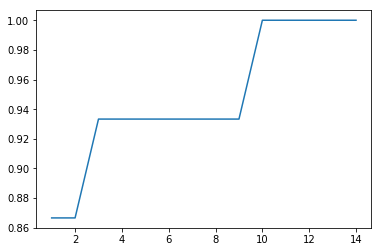

In [17]:
plt.plot(np.arange(2, n), sc)

**MNIST**

In [18]:
#mnist = fetch_mldata('MNIST original')
mnist = fetch_openml('mnist_784')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [20]:
#%time pairwise_distances(X_train.astype(np.float), np.asarray(X_test).astype(np.float))

In [21]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [22]:
%time clf.fit(X_train, y_train)

CPU times: user 176 ms, sys: 4 ms, total: 180 ms
Wall time: 183 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [23]:
%time my_clf.fit(X_train, y_train)

CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 57.8 ms


In [24]:
%time clf.predict(X_test)

CPU times: user 4.63 s, sys: 244 ms, total: 4.88 s
Wall time: 2.69 s


array(['8', '0', '7', '2', '2', '9', '1', '1', '1', '2', '1', '0', '7',
       '3', '5', '4', '7', '2', '9', '7', '1', '3', '8', '1', '0', '0',
       '2', '7', '7', '3', '6', '9', '0', '7', '7', '1', '2', '9', '2',
       '6', '2', '5', '2', '9', '2', '3', '4', '6', '8', '1', '9', '4',
       '1', '9', '0', '2', '6', '7', '3', '9', '3', '0', '1', '8', '5',
       '7', '6', '1', '0', '1', '8', '6', '3', '6', '9', '7', '1', '7',
       '4', '4', '3', '7', '7', '0', '3', '7', '8', '1', '6', '2', '2',
       '4', '8', '9', '7', '1', '9', '6', '6', '5', '1', '8', '0', '7',
       '8', '5', '0', '0', '7', '1', '5', '3', '8', '9', '7', '7', '5',
       '7', '0', '6', '7', '8', '8', '3', '7', '9', '8', '8', '5', '7',
       '0', '2', '4', '7', '2', '9', '3', '2', '4', '5', '6', '3', '4',
       '3', '9', '8', '2', '5', '9', '0', '0', '4', '2', '3', '8', '2',
       '4', '7', '9', '2', '1', '0', '1', '6', '7', '2', '5', '4', '8',
       '3', '9', '6', '3', '1', '2', '6', '6', '6', '5', '2', '2

In [25]:
%time my_clf.predict(X_test)

CPU times: user 6.94 s, sys: 272 ms, total: 7.22 s
Wall time: 4.79 s


array(['8', '0', '7', '2', '2', '9', '1', '1', '1', '2', '1', '0', '7',
       '3', '5', '4', '7', '2', '9', '7', '1', '3', '8', '1', '0', '0',
       '2', '7', '7', '3', '6', '9', '0', '7', '7', '1', '2', '9', '2',
       '6', '2', '5', '2', '9', '2', '3', '4', '6', '8', '1', '9', '4',
       '1', '9', '0', '2', '6', '7', '3', '9', '3', '0', '1', '8', '5',
       '7', '6', '1', '0', '1', '8', '6', '3', '6', '9', '7', '1', '7',
       '4', '4', '3', '7', '7', '0', '3', '7', '8', '1', '6', '2', '2',
       '4', '8', '9', '7', '1', '9', '6', '6', '5', '1', '8', '0', '7',
       '8', '5', '0', '0', '7', '1', '5', '3', '8', '9', '7', '7', '5',
       '7', '0', '6', '7', '8', '8', '3', '7', '9', '8', '8', '5', '7',
       '0', '2', '4', '7', '2', '9', '3', '2', '4', '5', '6', '3', '4',
       '3', '9', '8', '2', '5', '9', '0', '0', '4', '2', '3', '8', '2',
       '4', '7', '9', '2', '1', '0', '1', '6', '7', '2', '5', '4', '8',
       '3', '9', '6', '3', '1', '2', '6', '6', '6', '5', '2', '2

In [26]:
%time clf.predict_proba(X_test)

CPU times: user 4.58 s, sys: 240 ms, total: 4.82 s
Wall time: 2.68 s


array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [27]:
%time my_clf.predict_proba(X_test)

CPU times: user 7.04 s, sys: 236 ms, total: 7.28 s
Wall time: 4.83 s


array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [28]:
clf.score(X_test, y_test)

0.97

In [29]:
my_clf.score(X_test, y_test)

0.97

Задание 4

In [30]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [32]:
%time clf.fit(X_train, y_train)

CPU times: user 57.5 s, sys: 104 ms, total: 57.6 s
Wall time: 57.5 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [33]:
%time my_clf.fit(X_train, y_train)

CPU times: user 54.9 s, sys: 248 ms, total: 55.2 s
Wall time: 54.9 s


In [34]:
%time clf.predict(X_test)

CPU times: user 1min 17s, sys: 4 ms, total: 1min 17s
Wall time: 1min 17s


array(['1', '2', '0', '3', '0', '0', '9', '4', '2', '5', '0', '6', '0',
       '1', '3', '4', '8', '8', '3', '6', '3', '8', '1', '5', '0', '2',
       '1', '9', '0', '8', '1', '3', '8', '0', '0', '7', '0', '0', '0',
       '9', '2', '3', '0', '8', '7', '6', '3', '3', '2', '2', '0', '5',
       '7', '2', '5', '9', '1', '4', '1', '3', '2', '5', '7', '5', '0',
       '1', '2', '8', '1', '0', '5', '1', '2', '8', '7', '8', '1', '8',
       '7', '5', '1', '8', '9', '6', '0', '2', '5', '6', '0', '4', '6',
       '2', '1', '3', '1', '4', '5', '0', '6', '4', '4', '3', '0', '3',
       '0', '9', '2', '9', '6', '3', '9', '6', '4', '3', '0', '4', '9',
       '4', '2', '1', '7', '1', '1', '8', '0', '7', '6', '7', '5', '7',
       '7', '3', '7', '1', '9', '5', '3', '6', '3', '9', '6', '6', '7',
       '8', '2', '4', '2', '4', '8', '9', '4', '4', '4', '6', '6', '5',
       '9', '1', '4', '9', '9', '5', '2', '3', '5', '9', '2', '6', '5',
       '7', '8', '5', '8', '5', '1', '0', '2', '9', '9', '2', '6

In [35]:
%time my_clf.predict(X_test)

CPU times: user 1min 21s, sys: 22 ms, total: 1min 22s
Wall time: 1min 22s


array(['1', '2', '0', '3', '0', '0', '9', '4', '2', '5', '0', '6', '0',
       '1', '3', '4', '8', '8', '3', '6', '3', '8', '1', '5', '0', '2',
       '1', '9', '0', '8', '1', '3', '8', '0', '0', '7', '0', '0', '0',
       '9', '2', '3', '0', '8', '7', '6', '3', '3', '2', '2', '0', '5',
       '7', '2', '5', '9', '1', '4', '1', '3', '2', '5', '7', '5', '0',
       '1', '2', '8', '1', '0', '5', '1', '2', '8', '7', '8', '1', '8',
       '7', '5', '1', '8', '9', '6', '0', '2', '5', '6', '0', '4', '6',
       '2', '1', '3', '1', '4', '5', '0', '6', '4', '4', '3', '0', '3',
       '0', '9', '2', '9', '6', '3', '9', '6', '4', '3', '0', '4', '9',
       '4', '2', '1', '7', '1', '1', '8', '0', '7', '6', '7', '5', '7',
       '7', '3', '7', '1', '9', '5', '3', '6', '3', '9', '6', '6', '7',
       '8', '2', '4', '2', '4', '8', '9', '4', '4', '4', '6', '6', '5',
       '9', '1', '4', '9', '9', '5', '2', '3', '5', '9', '2', '6', '5',
       '7', '8', '5', '8', '5', '1', '0', '2', '9', '9', '2', '6

In [36]:
%time clf.predict_proba(X_test)

CPU times: user 1min 17s, sys: 16 ms, total: 1min 17s
Wall time: 1min 18s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [37]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 22s, sys: 32 ms, total: 1min 22s
Wall time: 1min 23s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [38]:
clf.score(X_test, y_test)

0.97

In [39]:
my_clf.score(X_test, y_test)

0.97

In [40]:
#X_test[0]

Задание 5

In [41]:
# seaborn - библиотека, основанная на matplotlib, удобно использовать из-за хороших дефолтных настроек
# matplotlib - Визуализация данных, построение графиков и диаграмм
# train_test_split разделение выборки на обучающую и тестовую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) нужен для реализации конвейера: 
# на вход функции подаётся выход другой функции ...  Удобно для реализации процедуры обработки данных, состоящей из нескольких этапов
#
# StandardScaler (from sklearn.preprocessing import StandardScaler) Нормализация выборки. Вычитает из значений выборки среднее и нормирует её, чтобы стандартное отклонение было <=1
# ClassifierMixin базовый класс классификаторов в sklearn
# NeighborsBase базовый класс классификаторов в sklearn для "искалок" ближайших соседей.
# KNeighborsMixin базовый класс классификаторов в sklearn для всех классов KNN классификаторов, cодержащих поиск ближайших соседей
# SupervisedIntegerMixin базовый класс классификаторов в sklearn, содержащий метод fit